In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cohen_kappa_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

Lab | Imbalanced data
We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

Instructions


Load the dataset and explore the variables.


In [2]:
data = pd.read_csv('customer_churn.csv')

We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.


Extract the target variable.


In [3]:
data.head()
y = data['Churn']
X = data.drop(['Churn'], axis=1)

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Extract the independent variables and scale them.


In [5]:
numData = data[['tenure', 'SeniorCitizen','MonthlyCharges']]
numq=numData['tenure'].quantile([.75])

In [6]:
numData.head()

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70


In [7]:
numq

0.75    55.0
Name: tenure, dtype: float64

numq.head()

In [8]:
transformer = MinMaxScaler().fit(numData)
scaled_x = transformer.transform(numData)
scaled_x

array([[0.01388889, 0.        , 0.11542289],
       [0.47222222, 0.        , 0.38507463],
       [0.02777778, 0.        , 0.35422886],
       ...,
       [0.15277778, 0.        , 0.11293532],
       [0.05555556, 1.        , 0.55870647],
       [0.91666667, 0.        , 0.86965174]])

Build the logistic regression model.


In [9]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(scaled_x, y)

Evaluate the model.


In [10]:
print("The accuracy of the model is: ",round(classification.score(scaled_x, y),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y,classification.predict(scaled_x)),2))

The accuracy of the model is:  0.79
The kappa of the model is:  0.41


Even a simple model will give us more than 70% accuracy. Why?


The Data is imbalanced and  our model just predicted mostly the majority class.

Synthetic Minority Oversampling Technique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. 

Apply imblearn.over_sampling.SMOTE to the dataset.

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
transformer = StandardScaler().fit(numData)
X_scaled = transformer.transform(numData)
X_sm, y_sm = smote.fit_sample(X_scaled, y)
pd.DataFrame(y_sm).value_counts()

Churn
Yes      5174
No       5174
dtype: int64

 Build and evaluate the logistic regression model. Is it there any improvement?

In [12]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_sm, y_sm)

print("The accuracy of the model is: ",round(classification.score(X_sm, y_sm),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_sm,classification.predict(X_sm)),2))

The accuracy of the model is:  0.73
The kappa of the model is:  0.47


Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. 

Apply imblearn.under_sampling.TomekLinks to the dataset. 

In [13]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks('majority')
transformer = StandardScaler().fit(numData)
X_scaled = transformer.transform(numData)
X_tl, y_tl = tl.fit_sample(X_scaled, y)
pd.DataFrame(y_tl).value_counts()

Churn
No       4694
Yes      1869
dtype: int64

Build and evaluate the logistic regression model. Is it there any improvement?

In [14]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_tl, y_tl)

print("The accuracy of the model is: ",round(classification.score(X_tl, y_tl),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_tl,classification.predict(X_tl)),2))

The accuracy of the model is:  0.79
The kappa of the model is:  0.45


The accuracy of the model on test set is: 0.78 
[[1865  201]
 [ 414  338]]


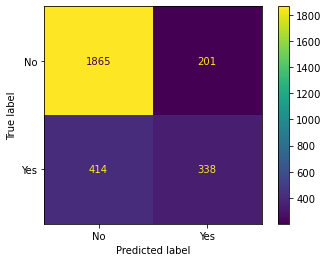

The Kappa of your model is: 0.39


In [15]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt




X_train, X_test, y_train, y_test = train_test_split(numData, y, test_size=0.4, random_state=100)


classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)

from sklearn.metrics import accuracy_score

predictions = classification.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))


In [40]:
from imblearn.under_sampling import TomekLinks

t2 = TomekLinks('majority')
transformer = StandardScaler().fit(numData)
X_scaled2 = transformer.transform(numData)
X_t2, y_t2 = t2.fit_sample(X_scaled2, y)
pd.DataFrame(y_t2).value_counts()




Churn
No       4694
Yes      1869
dtype: int64

In [46]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_tl, y_tl)

print("The accuracy of the model is: ",round(classification.score(X_tl, y_tl),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_tl,classification.predict(X_tl)),2))

The accuracy of the model is:  0.79
The kappa of the model is:  0.45


Tomek with and under sampling.

In [49]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

rus2 = RandomUnderSampler()

X_rus2, y_rus2 = rus2.fit_sample(X_t2, y_t2)





In [50]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_rus2, y_rus2)

print("The accuracy of the model is: ",round(classification.score(X_rus2, y_rus2),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_rus2,classification.predict(X_rus2)),2))

The accuracy of the model is:  0.76
The kappa of the model is:  0.52


Tomek with and over sampling.

In [51]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

Ros = RandomOverSampler()

X_Ros, y_Ros = Ros.fit_sample(X_t2, y_t2)

In [52]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_Ros, y_Ros)

print("The accuracy of the model is: ",round(classification.score(X_Ros, y_Ros),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_Ros,classification.predict(X_Ros)),2))

The accuracy of the model is:  0.75
The kappa of the model is:  0.51


Tomek with and Smote sampling.

In [53]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_sample(X_t2, y_t2)
pd.DataFrame(y_sm).value_counts()

Churn
Yes      4694
No       4694
dtype: int64

In [54]:
classification = LogisticRegression(random_state=0, solver='lbfgs',
                        multi_class='ovr').fit(X_sm, y_sm)

print("The accuracy of the model is: ",round(classification.score(X_sm, y_sm),2))
print("The kappa of the model is: ",round(cohen_kappa_score(y_sm,classification.predict(X_sm)),2))

The accuracy of the model is:  0.75
The kappa of the model is:  0.51


All of the measures improved our model over our predictions without data imbalance mitigtion but there was very little variance betweeen methods.